Correlation Matrix:
                       Market Share    Profit  Batch Interval  \
Market Share           1.000000e+00  0.229232   -2.707076e-16   
Profit                 2.292325e-01  1.000000    8.585082e-03   
Batch Interval        -2.707076e-16  0.008585    1.000000e+00   
Status of Equilibrium  5.257348e-16 -0.423948   -1.401266e-17   

                       Status of Equilibrium  
Market Share                    5.257348e-16  
Profit                         -4.239484e-01  
Batch Interval                 -1.401266e-17  
Status of Equilibrium           1.000000e+00  


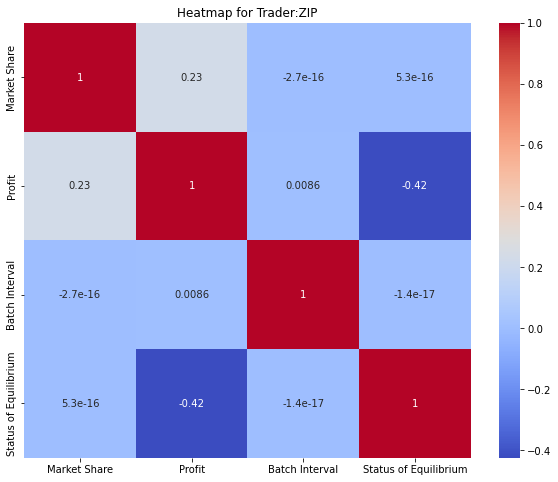

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data into a DataFrame
df = pd.read_csv('ZIP_data.csv')

# Split the 'Scenario' column into 'Batch Interval' and 'Status of Equilibrium'
df['Batch Interval'] = df['Scenario'].apply(lambda x: float(x.split(' ')[0][:-1]))
df['Status of Equilibrium'] = df['Scenario'].apply(lambda x: x.split(' ')[1] + ' ' + x.split(' ')[2])

# Encode the 'Status of Equilibrium' column
df['Status of Equilibrium'] = df['Status of Equilibrium'].map({'static P*': 0, 'dynamic P*': 1})

# Drop the original 'Scenario' column
df.drop('Scenario', axis=1, inplace=True)

# Calculate the correlation matrix
corr_matrix = df[['Market Share', 'Profit', 'Batch Interval', 'Status of Equilibrium']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Trader:ZIP')
plt.show()
